# Project 1: Building a Color Magnitude Diagram of the Milky Way Field 

*FILL THIS IN*

NAME: Madison Vaughan

UTEID: mgv562

DATE: September 19th, 2022

GRADE : /61

Goal : Construct 3 color magnitude diagrams of 500,000+ random Milky Way Stars. These will include a:
1. Raw (reddend) color (bp-rp) vs absolute magnitude (M_G) diagram
2. De-reddend color(bp-rp)-magnitude (M_G) diagram
3. Raw (reddend) color (bp-rp)-magnitude (M_G) of stars with low extinction with E(BP-RP) < 0.05mag

Data sets: 
high_quality_gaia.fits [50 MB] = astrometry, photometry for 500,000+ random milky way stars with uncertainties in parallax better than 1%. Data location : https://utexas.box.com/s/n4sem91c6z80w1hizhxlpyud36cw4202
Download and save to the SAME LOCATION as this file.


Lets begin by loading our libraries: 



In [1]:
#lets make a plots interactive
%matplotlib inline 

#Importing libraries 
import numpy as np
import matplotlib.pyplot as p
import astropy
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import Galactic
from astropy.coordinates import ICRS
from cycler import cycler

#Lets set some of the default parameters for plotting. This is not needed but i like to style my plots.
p.rc('axes',prop_cycle=(cycler('color', ['k','b','g','r','c','m','y'])))
p.rcParams['lines.linewidth']= 1.5
p.rcParams['axes.linewidth']=2.0
p.rcParams['font.size']= 15.0
p.rcParams['axes.labelsize']=16.0
p.rcParams['axes.unicode_minus']=False
p.rcParams['xtick.major.size']=6
p.rcParams['xtick.minor.size']=3
p.rcParams['xtick.major.width']=1.5#2.0
p.rcParams['xtick.minor.width']=1.0
p.rcParams['axes.linewidth']=2.5
p.rcParams['axes.titlesize']=20#'large'
p.rcParams['xtick.labelsize'] = 20#'x-large' # fontsize of the tick labels
p.rcParams['ytick.labelsize']=20 #'x-large'
p.rcParams['ytick.major.width']=2.0 #4
p.rcParams['ytick.minor.width']=1.0 #2.0

## Loading the Data
Now lets load in the Dataset and see whats inside (i.e. print the column names)

In [2]:
T = Table.read('./high_quality_gaia.fits')
T.colnames

['source_id',
 'ra',
 'dec',
 'l',
 'b',
 'parallax',
 'pmra',
 'pmdec',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag',
 'bp_rp',
 'ag_gspphot',
 'azero_gspphot',
 'ebpminrp_gspphot',
 'has_rvs',
 'parallax_over_error',
 'radial_velocity']

You should get something like the following columns
'source_id' = source id of the star

 'ra', = right acesnsion in deg 
 
 'dec', = declination in deg
 
 'l', = Galactic longitude in deg
 
 'b', = Galactic latitude in degree
 
 'parallax', = parallax in mas
 
 'pmra', = proper motion * cos(DEC) in the RA direction in degree
 
 'pmdec', proper motion in declination in deg
 
 'phot_g_mean_mag', apparent G magnitude in mag
 
 'phot_bp_mean_mag',apparent BP magnitude in mag
 
 'phot_rp_mean_mag',apparent RP magnitude in mag
 
 'bp_rp', BP-RP
 
 'ag_gspphot', A_G (extinction in Gaia G) in mag
 
 'azero_gspphot', A0_G specific extinction in G at 550 nm 
 
 'ebpminrp_gspphot', E(BP-RP) reddening in mag
 
 'has_rvs', has an RVS spectrum True or False
 
 'parallax_over_error', parallax/parallax_error
 
 'radial_velocity' = Radial Velocity in km/s
 

## Plot the Sky positions (in both Equatorial and Galactic coordinates) of stars in the Sample 


In order to do this we will need to RA, DEC (Equatorial), and l, b (Galactic) columns so lets grab those columns  and plot them up

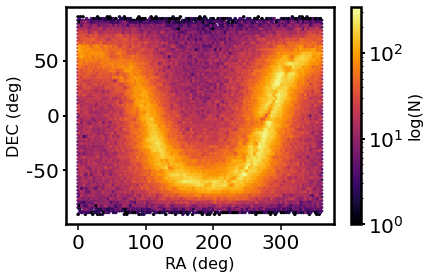

In [3]:
# plot for Equatorial Coordinates
p.figure()
RA = T['ra']
PLT = p.hexbin(RA,T['dec'],bins='log',mincnt=1,cmap='inferno')
p.xlabel('RA (deg)')
p.ylabel('DEC (deg)')
p.colorbar(PLT,label='log(N)');


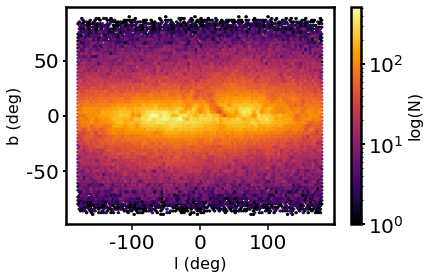

In [4]:
# plot for Galactic Coordinates
p.figure()
l = T['l']
l[np.where(l>=180)]=l[np.where(l>=180)]-360
PLT = p.hexbin(T['l'],T['b'],bins='log',mincnt=1,cmap='inferno')
p.xlabel('l (deg)')
p.ylabel('b (deg)')
p.colorbar(PLT,label='log(N)');


## Plot the Distance Distribution

First compute the heliocentric distances to each star then plot a histogram of the distance distribution using 50 bins.

After which compute the mean and median distances

The Mean Distance is 1362.17 parsecs
The Median Distance is 1194.06 parsecs


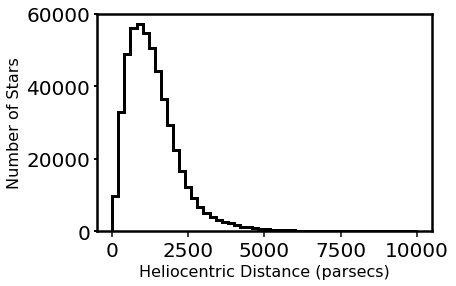

In [8]:
parallaxAS= T['parallax']
distance = 1000/parallaxAS

p.figure();
p.hist(distance,histtype='step',lw=3,bins=50);
p.xlabel('Heliocentric Distance (parsecs)')
p.ylabel('Number of Stars')
mediandist = np.median(distance)
meandist = np.mean(distance)
print('The Mean Distance is %g parsecs'%meandist)     # could do %0.2f to get a float of 2 decimal places 
print('The Median Distance is %g parsecs'%mediandist)

# p.axvline(x=meandist or mediandist, etc) for plotting vertical line at the median and mean on the figure

## Create the First Color Magnitude Diagram

With the color and magnitude already in the table, lets now plot our first (raw) color (bp-rp) magnitude (absolute G magnitude) diagram. Since there are 500,000 points, use a 2-D histogram to make this plot. Don't forget to invert the y-axis since magnitudes go in the opposite direction.


In [6]:
Gapp = T['phot_g_mean_mag']
BP_RP = T['bp_rp']
Gabs = Gapp - (5*np.log10(distance)) +5

Now that we have computed the color and absoulute magnitude lets now plot our first CMD!

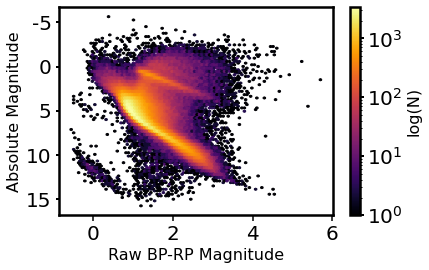

In [7]:
p.figure()
PLT=p.hexbin(BP_RP,Gabs,bins='log',mincnt=1,cmap='inferno') 
p.xlabel('Raw BP-RP Magnitude')
p.ylabel('Absolute Magnitude')
p.gca().invert_yaxis()
p.tight_layout()
p.colorbar(PLT,label='log(N)');

## Create the Second (de-reddend) Color Magnitude Diagram
With the first (raw) color and magnitude in hand, lets now plot our second color magnitude diagram that has been corrected for reddening and extinction. Since there are 500,000 points, use a 2-D histogram to make this plot. Don't forget to invert the y-axis since magnitudes go in the opposite directon

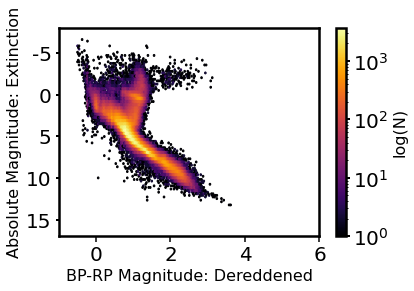

In [8]:
Ag = T['ag_gspphot'] 
G0 =  Gabs-Ag
Ebprp = T['ebpminrp_gspphot']
BP_RP0 = BP_RP - Ebprp
p.figure()
PLT=p.hexbin(BP_RP0,G0,bins='log',mincnt=1,cmap='inferno') # could actually use hist2d(x,y,cmin=1) but that is confusing so no lol
p.xlabel('BP-RP Magnitude: Dereddened')
p.ylabel('Absolute Magnitude: Extinction')
p.xlim(-1,6) # I'm adding these limits for 2 and 3 because I want to compare the graphs with all the same axes. And it flips the axis
p.ylim(17,-8)
p.colorbar(PLT,label='log(N)')
p.tight_layout()

## Create the Final (low extinction) Color Magnitude Diagram
Lets now select only those stars where the color excess is low E(BP-RP) < 0.05mag.

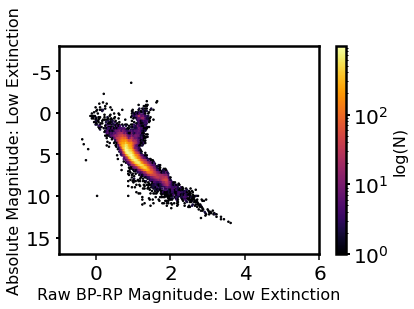

In [9]:
indicies = (Ebprp<0.05)  
Gabs = Gapp[indicies] - (5*np.log10(1000/parallaxAS[indicies])) +5 - Ag[indicies] # try to figure out how to use the where function for this!!!
p.figure()
PLT=p.hexbin(BP_RP[indicies],Gabs,bins='log',mincnt=1,cmap='inferno')
p.xlabel('Raw BP-RP Magnitude: Low Extinction')
p.ylabel('Absolute Magnitude: Low Extinction')
p.xlim(-1,6)
p.ylim(17,-8)
p.colorbar(PLT,label='log(N)')
p.tight_layout()

## Answer these Qs (6 pts)
Q1: Are the stars located in one particular direction or all around the sky?

A1: From the equitorial and galactic coordinate graphs, we can see that the highest "density" or amount of stars are located around a certain plane. In the equitorial graph, they seem have a trendline that maps out the galatic plane as if it were like a satellite ground-track projected on the Earth's surface. This is supported by the galactic coordinates graph, as we can see the majority of the stars are centered latitude-wise around 0 deg, which we know to be the galatic plane. From the knowledge of these two graphs and our understanding of the galaxy, we can say that the majority of the stars in this dataset are located in one particular plane along the disc of the galaxy, which I would assume to be the stars of the Milky Way.

Q2: What is the mean distance to the stars in the sample (in pc) :

A2 : The Mean Distance is 1362.17 pc

Q3: What is the median distance to the stars in the sample (in pc):

A3: The Median Distance is 1194.06 pc

Q4: Are the median and mean the same? Why or why not?

A4: The median and mean are not the same. The mean is the true average of all the distances in our data set, while the median simply marks the exact 'middle number' in our data if it were numerically ascending/descending. The median being lower than the mean indicates that there are probably more stars in this data set that are closer to us than than the calculated average distance.

Q5: The de-reddened and low extinction Color magnitude diagrams should look similar! Do they? If not, why not?

A5: They do look pretty similar. The low extinction CMD is like a more cut-down version of the de-reddened CMD where you can see a better trend line for (what I assume to be) main sequence stars. 

Q6 How many of these stars are observable (with altitude > 40o) from McDonald Observatory (lat, long = 30.6797° N, 104.0247° W)? How do you know?
A6: 388030 of these stars are observable with an altitude greater than 40 degrees. We can find this by calculating the due North and due South range of altitudes possible from McDonald Observatory, and filter out the values that exceed 90 deg N and 40 deg S because those stars would not be visible from McDonald anyways. 


NOTE: 

To answer Q6 you will need to make use of the len() and np.where()
len() tells you how many elements are in an array and 
np.where(condition) determines the indices in an array where the condition is satisfied!
You task will be to write the condition appropriatly 

In [10]:
lat = 30.6797
long = 104.0247
alt_N = 180(90-lat+T['dec'])
alt_S = 90-lat+T['dec']
Num_stars = len(np.where( ((alt_N >= 40) & (alt_N <= 90)) | ((alt_S >= 40) & (alt_N <= 40))  )[0]) #last one should be alt_S
print('There %i stars that are observable with altitude > 40 degrees'%Num_stars)


There 388030 stars that are observable with altitude > 40 degrees
